In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
x = np.arange(0.01,1,.01)
t0 = 0
t1 = 1
t2 = 0.5

In [3]:
y = np.log(x)
y0 = -np.log(x)
y1 = -np.log(1-x)

# Error para problemas de clasificación

In [9]:
plt.figure(1)

plt.subplot(1,3,1)
plt.plot(x,y,'k--')
plt.title('log(x)')
plt.grid(True)


plt.subplot(1,3,2)
plt.plot(x,y0, 'green')
plt.title('-log(x) si T=1')
plt.xlabel('x = y obtenida')
plt.annotate('error tiende a infinito \nsi x = 0', xy=(0, 4.5), xytext=(.5, 4),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.grid(True)


plt.subplot(1,3,3)
plt.plot(x,y1, 'red')
plt.title('-log(1-x) si T=0')
plt.xlabel('x = y obtenida')
plt.annotate('error tiende a infinito\nsi x = 1', xy=(1, 4.5), xytext=(.2, 4),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.grid(True)

plt.show()

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (20,) and (99,)

# Logistic Regression

In [10]:
def sumatoria(x):
    return np.sum(x)

class LogisticRegression():
    def __init__(self, max_iter=100000, eta=0.8, max_error=0.1):
        self.max_iter = max_iter
        self.eta = eta
        self.max_error = max_error
        self.training = False
        
    #Agregar funcion de coste
    def cost(self,x,y):
        return -1*np.sum(y*np.log(self.eval(x)) + (1-y)*(np.log(1-self.eval(x))))/x.size
    
    #Agregar calculo de gradiente
    def grad(self,x,y):
        return sumatoria(x.T*(self.eval(x) - y))/x.size
    
    def fit(self, x, y):
        self.training = not self.training
        x = np.c_[x, np.ones(len(x))]
        instances, features = x.shape
        self.w = np.random.uniform(-.3, .3, size=(features,))
        for i in range(self.max_iter):
            self.w = self.w - self.eta*self.grad(x,y)
            error = self.cost(x,y)
            if error <= self.max_error:
                self.training = not self.training
                return error
        self.training = not self.training
        return error
        
    def eval(self, x):
        if not self.training:
            x = np.c_[x, np.ones(len(x))]
        return 1/(1+np.exp(-np.dot(x,self.w)))

In [11]:
x = np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
model = LogisticRegression()

model.fit(x,y)

0.3423050407078201

<IPython.core.display.Javascript object>


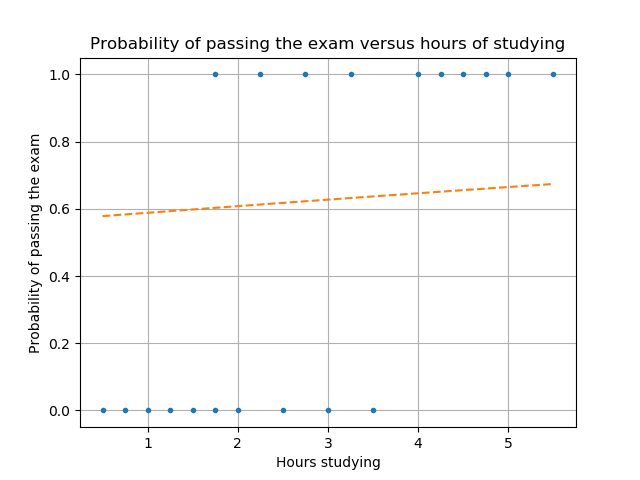

In [12]:
plt.figure()
plt.plot(x, y, '.')
plt.plot(x, model.eval(x), '--')
plt.grid()
plt.title('Probability of passing the exam versus hours of studying')
plt.xlabel('Hours studying')
plt.ylabel('Probability of passing the exam')
plt.show()